In [69]:
# Import library yang dibutuhkan.
import pandas as pd
from sklearn.datasets import load_breast_cancer # Ini hanya contoh, tidak digunakan dalam kode ini
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # Tidak digunakan dalam kode ini
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score # Tidak digunakan dalam kode ini
from google.colab import drive

# Abaikan peringatan
import warnings
warnings.filterwarnings("ignore")

In [70]:
# Muat dataset dari Google Drive.
drive.mount('/content/drive')
file1= "/content/drive/My Drive/latihan data analisis/Mall_Customers.csv"
file1 # Menampilkan path file
data = pd.read_csv(file1) # Membaca data
data # Menampilkan data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [71]:
# Cek jumlah baris & kolom.
print("Jumlah Baris:", data.shape[0])
print("Jumlah Kolom:", data.shape[1])

# Cek missing values.
print("\nMissing values per column:")
print(data.isnull().sum())

Jumlah Baris: 200
Jumlah Kolom: 5

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [72]:
# Cek duplicate.
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Number of duplicate rows:
0


In [73]:
# Normalisasi fitur numerik.
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data_numerical = data[numerical_features]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_features)

print("\nData yang Dinormalisasi (5 baris pertama):")
display(data_scaled_df.head())


Data yang Dinormalisasi (5 baris pertama):


Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

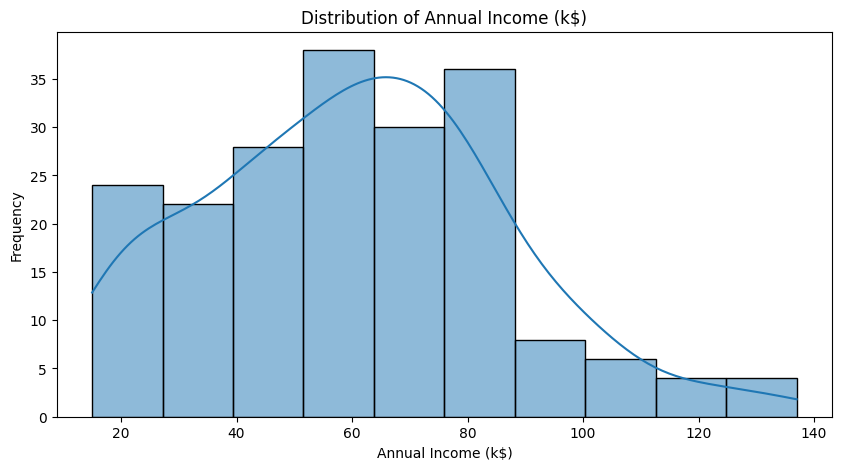

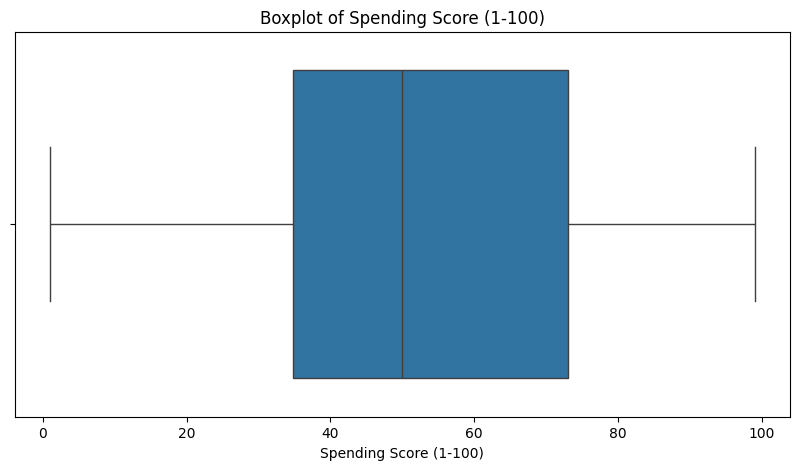

In [74]:
# Lihat distribusi tiap fitur (histogram/boxplot).
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in numerical_features:
    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [75]:
# Analisis hubungan antar fitur (scatter plot, heatmap korelasi).
sns.pairplot(data[numerical_features])
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02)
plt.show()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [76]:
# Pilih fitur penting.
important_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
print("\nFitur Penting yang dipilih:", important_features)


Fitur Penting yang dipilih: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [77]:
# Dataset untuk clustering dengan 3 fitur penting (sudah dinormalisasi).
data_for_clustering_3_features = data_scaled_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print("Dataset untuk Clustering dengan 3 Fitur Penting (dinormalisasi, 5 baris pertama):")
display(data_for_clustering_3_features.head())

Dataset untuk Clustering dengan 3 Fitur Penting (dinormalisasi, 5 baris pertama):


Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

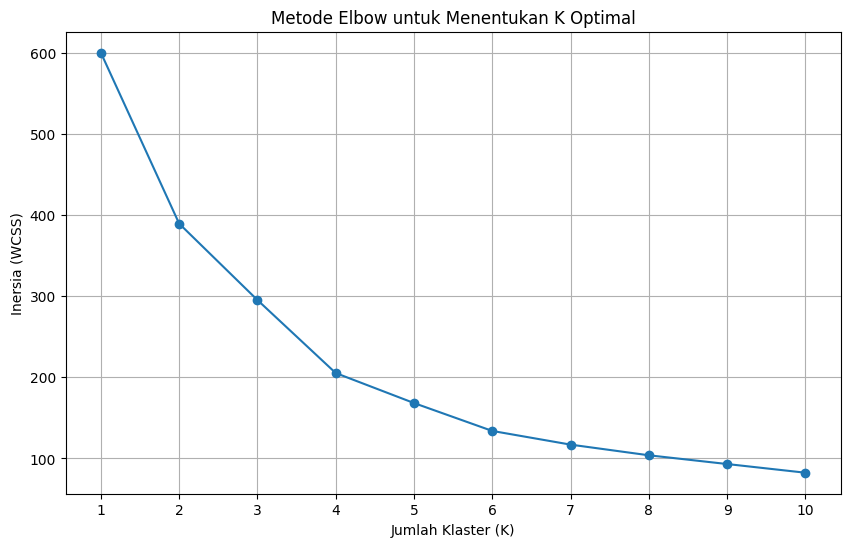

Nilai Inersia untuk setiap K:
K = 1: 600.00
K = 2: 389.39
K = 3: 295.21
K = 4: 205.23
K = 5: 168.25
K = 6: 133.87
K = 7: 117.01
K = 8: 103.87
K = 9: 93.09
K = 10: 82.39


In [78]:
# Metode Elbow untuk menentukan K optimal.
X_elbow = data_scaled_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_elbow)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inersia (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Nilai Inersia untuk setiap K:")
for k, inert in zip(k_range, inertia):
    print(f"K = {k}: {inert:.2f}")

In [79]:
# Melakukan clustering K-Means dengan K optimal.
optimal_k = 5
X_cluster = data_for_clustering_3_features
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_model.fit(X_cluster)
cluster_labels = kmeans_model.labels_

# Menambahkan label klaster ke DataFrame asli.
data['Cluster'] = cluster_labels

print(f"\nData dengan Label Klaster (5 baris pertama, K={optimal_k}):")
display(data.head())


Data dengan Label Klaster (5 baris pertama, K=5):


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1


Ringkasan Statistik Fitur Numerik per Klaster:


Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064

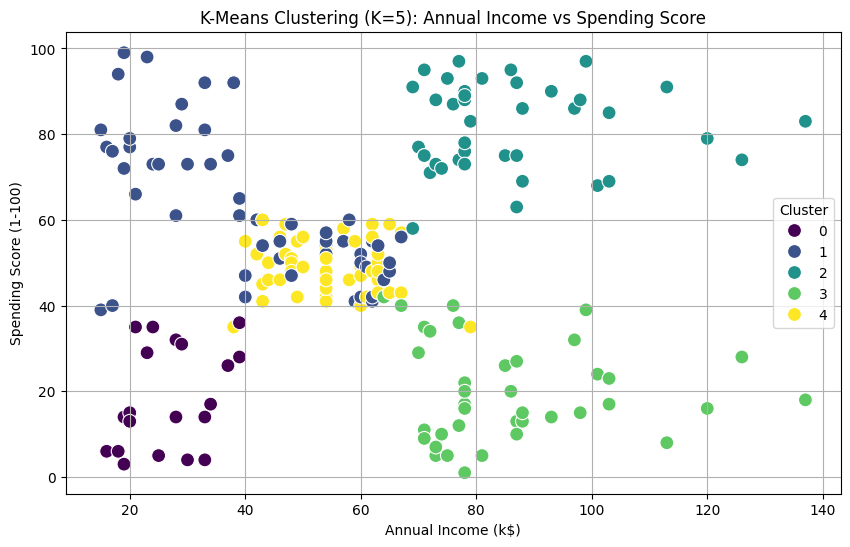

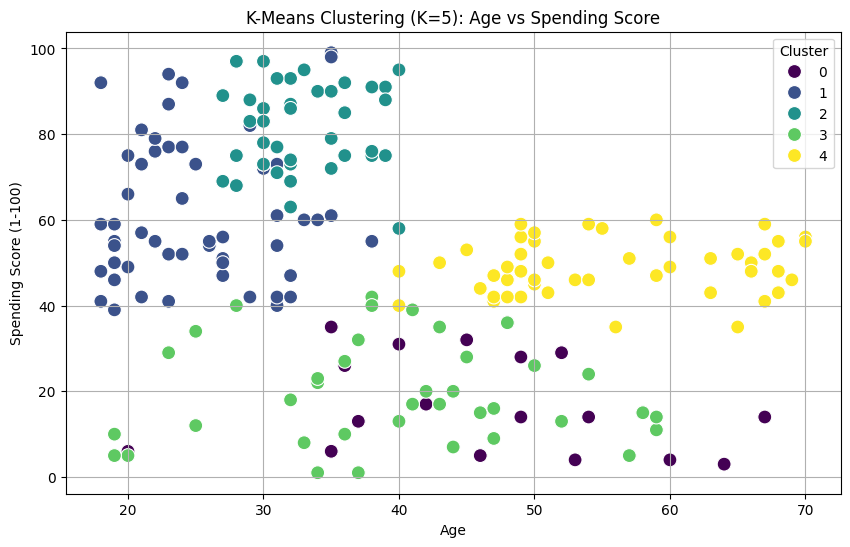

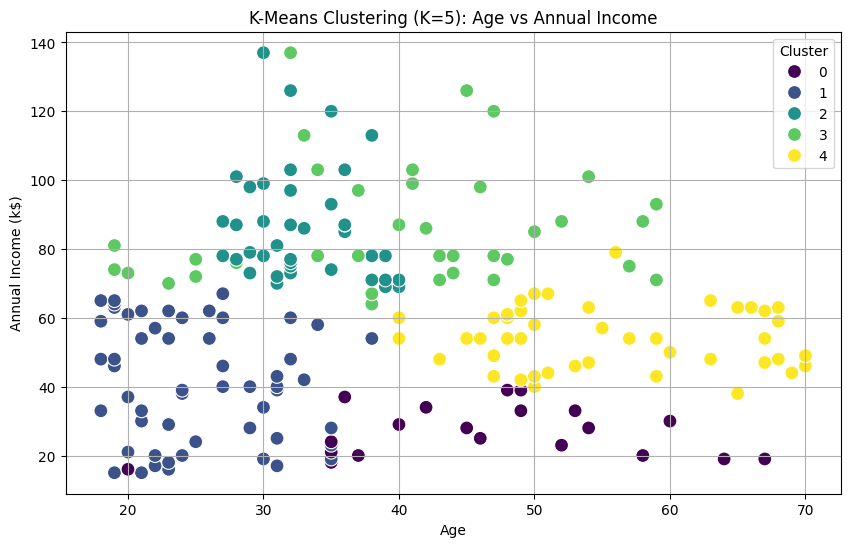

In [80]:
# Analisis dan visualisasi hasil clustering.
print("\nRingkasan Statistik Fitur Numerik per Klaster:")
display(data.groupby('Cluster')[numerical_features].mean())

# Visualisasi scatter plot Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title(f'K-Means Clustering (K={optimal_k}): Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Visualisasi scatter plot Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title(f'K-Means Clustering (K={optimal_k}): Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Visualisasi scatter plot Age vs Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)', hue='Cluster', palette='viridis', s=100)
plt.title(f'K-Means Clustering (K={optimal_k}): Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [81]:
# Interpretasi hasil dan kesimpulan.
print("\nInterpretasi Klaster:")
print("- Klaster 0: Pelanggan usia menengah ke atas dengan pendapatan rendah dan skor belanja rendah. Mungkin adalah 'pelanggan hemat' atau 'tidak sering berbelanja'.")
print("- Klaster 1: Pelanggan usia muda dengan pendapatan menengah ke bawah dan skor belanja tinggi. Mungkin adalah 'pelanggan muda yang antusias' atau 'pemburu tren'.")
print("- Klaster 2: Pelanggan usia menengah dengan pendapatan tinggi dan skor belanja tinggi. Mungkin adalah 'pelanggan kelas atas' atau 'pembelanja besar'.")
print("- Klaster 3: Pelanggan usia menengah ke atas dengan pendapatan tinggi dan skor belanja rendah. Mungkin adalah 'pelanggan mapan tapi hemat' atau 'tidak tertarik dengan tawaran mall'.")
print("- Klaster 4: Pelanggan usia lebih tua dengan pendapatan dan skor belanja menengah. Mungkin adalah 'pelanggan setia' atau 'pembelanja moderat'.")

print("\nKesimpulan:")
print(f"Dengan menggunakan algoritma K-Means dengan K={optimal_k}, kita berhasil mengelompokkan pelanggan mall ke dalam beberapa segmen yang berbeda berdasarkan usia, pendapatan tahunan, dan skor belanja.")
print("Segmentasi ini dapat digunakan oleh pihak mall untuk strategi pemasaran yang lebih terarah, penawaran promosi yang disesuaikan, atau penempatan toko yang strategis.")
print("Misalnya, klaster dengan skor belanja tinggi dapat ditargetkan dengan program loyalitas atau diskon khusus, sementara klaster dengan pendapatan tinggi dan skor belanja rendah dapat ditargetkan dengan promosi produk mewah.")


Interpretasi Klaster:
- Klaster 0: Pelanggan usia menengah ke atas dengan pendapatan rendah dan skor belanja rendah. Mungkin adalah 'pelanggan hemat' atau 'tidak sering berbelanja'.
- Klaster 1: Pelanggan usia muda dengan pendapatan menengah ke bawah dan skor belanja tinggi. Mungkin adalah 'pelanggan muda yang antusias' atau 'pemburu tren'.
- Klaster 2: Pelanggan usia menengah dengan pendapatan tinggi dan skor belanja tinggi. Mungkin adalah 'pelanggan kelas atas' atau 'pembelanja besar'.
- Klaster 3: Pelanggan usia menengah ke atas dengan pendapatan tinggi dan skor belanja rendah. Mungkin adalah 'pelanggan mapan tapi hemat' atau 'tidak tertarik dengan tawaran mall'.
- Klaster 4: Pelanggan usia lebih tua dengan pendapatan dan skor belanja menengah. Mungkin adalah 'pelanggan setia' atau 'pembelanja moderat'.

Kesimpulan:
Dengan menggunakan algoritma K-Means dengan K=5, kita berhasil mengelompokkan pelanggan mall ke dalam beberapa segmen yang berbeda berdasarkan usia, pendapatan tahunan,